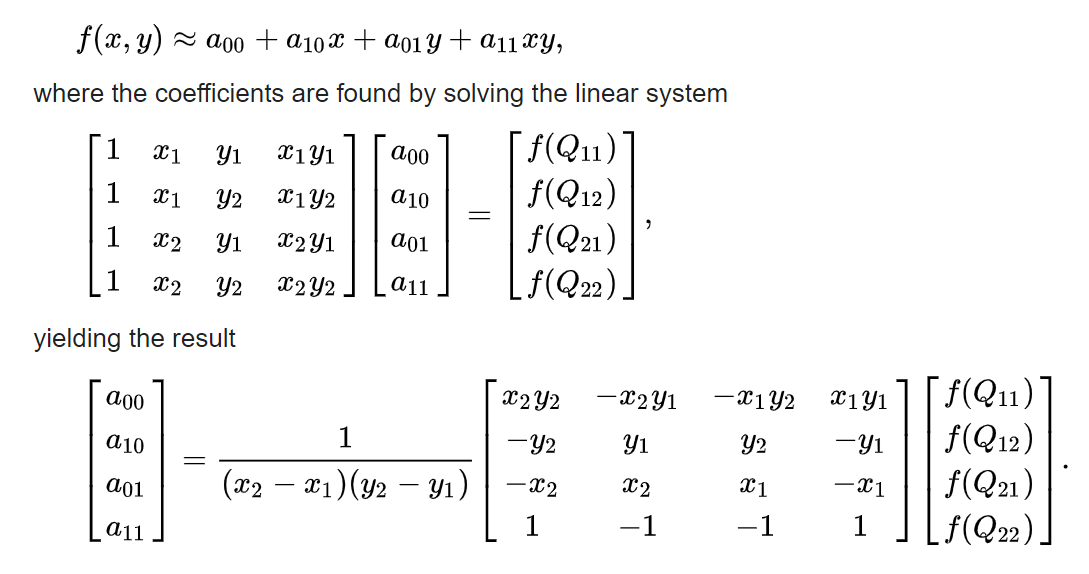

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [46]:
#Inciso A) Verificacion Sympy 
def simbolica(i,j):
    x=sym.Symbol('x',Real=True)
    y=sym.Symbol('y',Real=True)
    r=(x**i)*(y**j)
    return r
a00=sym.Symbol('a00',Real=True)
a10=sym.Symbol('a10',Real=True)
a01=sym.Symbol('a01',Real=True)
a11=sym.Symbol('a11',Real=True)
parametros=np.array([a00,a01,a10,a11])

l=[]
for i in range(2):
    for j in range(2):
        l.append(simbolica(i,j))
matriz=(np.array(l))

temp_espejo=np.dot(matriz,parametros)
print("La funcion es de la forma: ",temp_espejo)

La funcion es de la forma:  a00 + a01*y + a10*x + a11*x*y


In [47]:
Q = np.array([1.,2.,0.5,0.3])
position = np.zeros((4,2))

position=np.zeros((4,2))
position[0]=[1,1]
position[1]=[-1,1]
position[2]=[-1,-1]
position[3]=[1,-1]
x = position.T[0]
y = position.T[1]
ones = np.array([1,1,1,1])
M = np.array([ones,x,y,x*y])
M_inv = np.linalg.inv(M)
a_nm = np.dot(Q,M_inv)
def Temperature(x,y,a_nm):
  return a_nm[0] + a_nm[1]*x + a_nm[2]*y + a_nm[3]*x*y

print("La temperatura en el punto (1,1) es: ",Temperature(1,1,a_nm)) 



La temperatura en el punto (1,1) es:  1.0


In [48]:
#Condiciones de Frontera: 
print("La temperatura en el punto (1,1) es: ",Temperature(1,1,a_nm)) 
print("La temperatura en el punto (-1,1) es: ",Temperature(-1,1,a_nm)) 
print("La temperatura en el punto (-1,-1) es: ",Temperature(-1,-1,a_nm)) 
print("La temperatura en el punto (1,-1) es: ",Temperature(1,-1,a_nm).round(1)) 

La temperatura en el punto (1,1) es:  1.0
La temperatura en el punto (-1,1) es:  2.0
La temperatura en el punto (-1,-1) es:  0.5
La temperatura en el punto (1,-1) es:  0.3


In [49]:
#Estimado de temperatura en el punto P=(0,0.5)
print("La temperatura en el punto (0,0.5) es: ",Temperature(0,0.5,a_nm)) 

La temperatura en el punto (0,0.5) es:  1.225


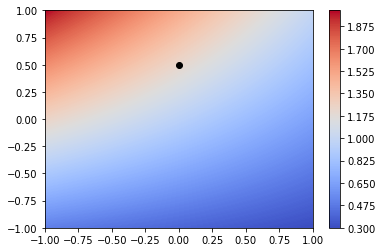

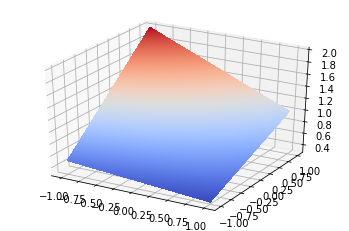

In [50]:
from re import X
#Grafica de la funcion de temperatura 
x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)
colourMap = plt.cm.coolwarm
X_k,Y_k = np.meshgrid(x,y)
Z = Temperature(X_k,Y_k,a_nm)
fig,ax = plt.subplots()
contourf_ = ax.contourf(X_k,Y_k,Z, 400,cmap=colourMap)
cbar = fig.colorbar(contourf_)
plt.scatter(0,0.5,color="black")


fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X_k, Y_k, Z, rstride=1, cstride=1, cmap=colourMap,linewidth=0, antialiased=False)


In [51]:
#Rotacion de el lente 
thetas =  np.linspace(0,2*np.pi,200)

x = np.array([1,-1,-1,1])
y = np.array([1,1,-1,-1])
min = 3
P_m = np.zeros((4,2))
P_m_theta =  np.zeros((4,2))
for  theta in thetas: 
  transf_m = np.array([[np.cos(theta), -1* np.sin(theta)],[np.sin(theta), np.cos(theta)]])
  for i in range(0,4):
    P_m[i] = [x[i],y[i]]
    P_m_theta[i] = np.dot(transf_m,P_m[i])
  x_theta = P_m_theta.T[0]
  y_theta = P_m_theta.T[1]
  M_t = np.array([ones,x_theta,y_theta,x_theta*y_theta])
  M_inv = np.linalg.inv(M_t)
  a_nm_2 = np.dot(Q,M_inv)
  if Temperature(0,0.5,a_nm_2)<min:
    min = Temperature(0,0.5,a_nm_2)
    angle = theta
    final_ajust = a_nm_2
degrees = ((np.pi/2) * angle) / np.pi
print("El angulo en el cual la temperatura es minima es: {} rad {} grados con una temperatura de {}K".format(angle.round(3),degrees.round(3),min.round(3)))


El angulo en el cual la temperatura es minima es: 2.652 rad 1.326 grados con una temperatura de 0.637K


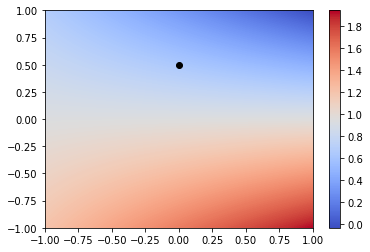

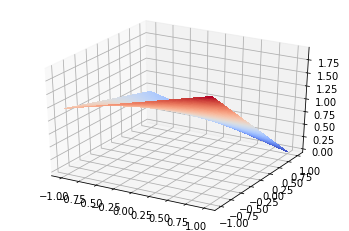

In [53]:
x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)
colourMap = plt.cm.coolwarm
X_k,Y_k = np.meshgrid(x,y)
Z_2= Temperature(X_k,Y_k,final_ajust)
fig,ax = plt.subplots()
contourf_2 = ax.contourf(X_k,Y_k,Z_2, 400,cmap=colourMap)
cbar = fig.colorbar(contourf_2)
plt.scatter(0,0.5,color="black")


fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X_k, Y_k, Z_2, rstride=1, cstride=1, cmap=colourMap,linewidth=0, antialiased=False)